<a href="https://colab.research.google.com/github/borismikwa/bioacoustics-classifiers/blob/main/fine_tune81k_arc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import librosa.display
import librosa
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from scipy import interp
from itertools import cycle
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD,Adam,Adamax
from sklearn.metrics import confusion_matrix, roc_auc_score,f1_score,precision_recall_fscore_support,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pylab as plt
from google.colab import files
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from keras import models
import librosa.display
import librosa
import sklearn.metrics as metrics
import math

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function to upload pickle file
def upload(feature, label):
  infile = open(feature,'rb')
  x= pickle.load(infile)
  infile.close()

  infile = open(label,'rb')
  y= pickle.load(infile)
  infile.close()

  return x, y

#Augmnantation funtion
def augment_data(aug_indices,data,Y,aug_target):
  aug = []
  y_aug_label = []
  counter = 1
  n=0
  num_iter = math.ceil((aug_target-len(aug_indices))/len(aug_indices))
  # data = list(X)
  while(n<num_iter):
    for i in range(len(aug_indices)) :
      #print(i)
      if counter > aug_target-len(aug_indices):
      #if counter > 5:
        break
      shift = np.random.randint(100)
      new_aug = np.roll(data[aug_indices[i]],shift=shift)
      #print(np.asarray(new_aug).shape)
  
      aug.append(new_aug)
      y_aug_label.append(Y[aug_indices[i]])
      counter += 1

    n += 1
  #aug =np.array(aug)
  #y_aug_label =np.array(y_aug_label)
  return np.asarray(aug), np.asarray(y_aug_label)

  #Function to  remove space
def remove_space_labels(images,Y_val):
  del_y = list(np.where(Y_val=='')[0])#Get the indices of labels to be deleted
  x_del = list(images)

  #Use a for loop to delete the indices with Spaces as target from X
  for i in del_y:
    x_del.pop(i)

  # Change the list produce into array
  X_prep = np.array( x_del)
  Y_prep = Y_val[Y_val!= '']
  
  return X_prep,Y_prep

#Function to remove nan
def remove_nan_labels(images,Y_val):
  del_y = list(np.where(Y_val=='nan')[0])#Get the indices of labels to be deleted
  x_del = list(images)

  #Use a for loop to delete the indices with Spaces as target from X
  for i in del_y:
    x_del.pop(i)

  # Change the list produce into array
  X_prep = np.array( x_del)
  Y_prep = Y_val[Y_val!= 'nan']
  
  return X_prep,Y_prep


Upload CRC

In [ ]:
crc_x, y_crc = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_crc.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_crc.pkl')

In [ ]:
crc_x.shape

(2050, 128, 216, 1)

In [ ]:
y_crc.shape

(2050,)

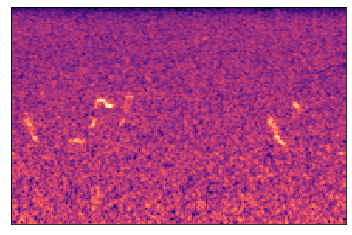

In [ ]:
librosa.display.specshow(crc_x[19,:,:,0])

get indicece

In [ ]:
crc_indices = np.where (y_crc=='CRC')[0]

In [ ]:
crc_x_aug, crc_y_aug = augment_data (crc_indices,crc_x,y_crc,4000)

In [ ]:
crc_x_aug.shape

(1950, 128, 216, 1)

In [ ]:
crc_y_aug.shape

(1950,)

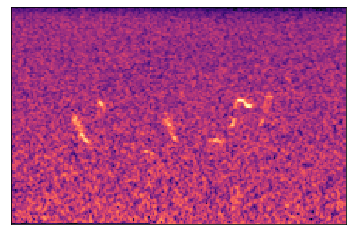

In [ ]:
librosa.display.specshow(crc_x_aug[19,:,:,0])

In [ ]:
crc_x = np.concatenate([crc_x,crc_x_aug],axis=0)
y_crc = np.concatenate([y_crc,crc_y_aug],axis = 0)

In [ ]:
del crc_x_aug,crc_y_aug

In [ ]:
crc_x.shape

(4000, 128, 216, 1)

In [ ]:
np.unique(y_crc)

array(['CRC'], dtype='<U5')

In [ ]:
y_crc.shape

(4000,)

Upload PTW

In [ ]:
ptw_x, y_ptw = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_ptw.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_ptw.pkl')

In [ ]:
ptw_x.shape

(5315, 128, 216, 1)

In [ ]:
ptw_x = ptw_x[0:4000]
y_ptw = y_ptw [0:4000]

In [ ]:
ptw_x.shape

(4000, 128, 216, 1)

In [ ]:
ptw_indices = np.where(y_ptw=="PTW")[0]
len(ptw_indices)

4000

In [ ]:
ptw_x_aug, ptw_y_aug = augment_data (ptw_indices,ptw_x,y_ptw,7000)

In [ ]:
ptw_x_aug.shape

(3000, 128, 216, 1)

In [ ]:
# ptw_x = np.concatenate([ptw_x,ptw_x_aug],axis=0)
# y_ptw = np.concatenate([y_ptw,ptw_y_aug],axis=0)
print("The X shape after augmentation is",ptw_x.shape)
print("The Y shape after augmentation is",y_ptw.shape)

The X shape after augmentation is (4000, 128, 216, 1)
The Y shape after augmentation is (4000,)


In [ ]:
# del ptw_x_aug, ptw_y_aug

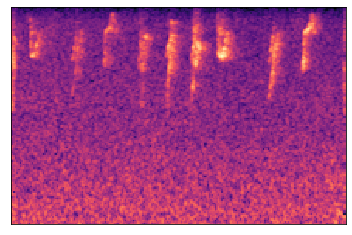

In [ ]:
librosa.display.specshow(ptw_x[123,:,:,0])

Upload NOISE

In [ ]:
# Load first part of  noise
noise_x1, y_noise1 = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_noise1.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_noise1.pkl')

In [ ]:
# Load t part of  noise
noise_x2, y_noise2 = upload('/content/drive/MyDrive/Thesis/Primary_data/train/X_noise2.pkl','/content/drive/MyDrive/Thesis/Primary_data/train/Y_noise2.pkl')

In [ ]:
noise_x =np.concatenate([noise_x1,noise_x2],axis =0)
y_noise = np.concatenate([y_noise1,y_noise2],axis =0)

In [ ]:
noise_x = noise_x[0:4000]
y_noise =y_noise[0:4000]

In [ ]:
del noise_x1,noise_x2,y_noise1,y_noise2

In [ ]:
np.unique(y_noise)

array(['NOISE'], dtype='<U5')

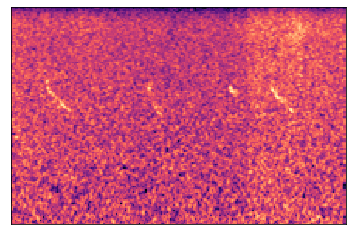

In [ ]:
librosa.display.specshow(noise_x[100,:,:,0])

**Prepared dataset for training**

In [ ]:
X = np.concatenate([crc_x, ptw_x,noise_x], axis=0)
Y = np.concatenate([y_crc, y_ptw,y_noise], axis=0)

In [ ]:
X.shape

(12000, 128, 216, 1)

In [ ]:
Y.shape

(12000,)

In [ ]:
del crc_x, ptw_x,noise_x,y_crc, y_ptw,y_noise

**Label Encoding**

In [ ]:
l_enc = preprocessing.LabelEncoder()
l_enc.fit(Y)
print(l_enc.classes_)
y_enc =l_enc.transform(Y)
l_enc.classes_

['CRC' 'NOISE' 'PTW']


array(['CRC', 'NOISE', 'PTW'], dtype='<U5')

**One hot encoding**

In [ ]:
y = tf.keras.utils.to_categorical(y_enc, num_classes=None, dtype="float32")

In [ ]:
y.shape

(12000, 3)

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(2400, 3)

In [ ]:
del X,Y #delete the dataset to create space

**Fine Tuning Prettrained Model**

Load a pretrained model

In [ ]:
# load a pre-trained model
#pre_trained_model = tf.keras.models.load_model('/content/drive/MyDrive/Thesis/Primary_data/pre_trained/aug_15000_with_collect_data')
pre_trained_model = tf.keras.models.load_model('/content/drive/MyDrive/Thesis/Secondary_data/model15000_true/smaller_arc8k')

In [ ]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128, 216, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
#
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
lr = 0.01

model.load_weights('/content/drive/MyDrive/Thesis/Primary_data/pre_trained/aug_15000_with_collect_data')
# for layer in model.layers[:-13]:
#   layer.trainable = False
#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

#model.set_weights(pre_trained_model.get_weights())
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Thesis/Primary_data/fine_tune/exprun6", 
                                                   mode = 'max',
                                                   monitor= 'val_accuracy',save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop,checkpoint_cb])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 126, 214, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 107, 32)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 61, 105, 32)       9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 52, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 28, 50, 32)        9248      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 24, 32)       

In [ ]:
 model.save("/content/drive/MyDrive/Thesis/Primary_data/fine_tune/fine_tune_12k_12kwt_run5_better") # save the final model

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Thesis/Primary_data/fine_tune/fine_tune_12k_12kwt_run5_better/assets


In [ ]:
#model.evaluate(X_test,y_test) #evaluate the model on the validation set

Test using training

In [ ]:
# Load the test set
X_testing, Y_testing = upload('/content/drive/MyDrive/Thesis/Primary_data/test/X.pkl','/content/drive/MyDrive/Thesis/Primary_data/test/Y.pkl')

In [ ]:
np.unique(Y_testing)

array(['', 'CRC', 'NOISE', 'NOISE ', 'NOSE', 'PTW', 'PTW10', 'PW', 'PWT',
       'nan'], dtype='<U6')

In [ ]:
# Clean the test set
Y_testing[Y_testing=='NOSE']='NOISE' # Change 'NOSE' to 'NOISE'
Y_testing[Y_testing=='NOISE ']='NOISE' # Change 'NOISE ' to 'NOISE'
Y_testing[Y_testing=='PWT']='PTW'  # Change 'PWT' to 'PTW'
Y_testing[Y_testing=='PW']='PTW'   # Change 'PW' to 'PTW'
Y_testing[Y_testing=='PTW10']='PTW' # Change 'PTW10' to 'PTW'

X_testing,Y_testing = remove_space_labels(X_testing,Y_testing) # Removed spaces in the test data set

In [ ]:
np.unique(Y_testing)

array(['CRC', 'NOISE', 'PTW', 'nan'], dtype='<U6')

In [ ]:
X_testing.shape

(14416, 128, 216, 1)

In [ ]:
Y_testing.shape

(14416,)

Remove nan values from the dataset

In [ ]:
np.where(Y_testing=='nan')[0] #Check the indices with nan values

array([ 8473, 10097, 10098, 10099])

In [ ]:
X_testing, Y_testing = remove_nan_labels(X_testing,Y_testing)#remove nan

In [ ]:
np.unique(Y_testing)

array(['CRC', 'NOISE', 'PTW'], dtype='<U6')

In [ ]:
X_testing.shape # Get the shape of the data set to confirm that nan values were removed

(14412, 128, 216, 1)

In [ ]:
Y_testing.shape

(14412,)

Load saved model and evaluate it

**Evaluate the model on the entire testing data**

Label encode the Y values

In [ ]:
l_enc_testing = preprocessing.LabelEncoder()
l_enc_testing.fit(Y_testing)
print(l_enc_testing.classes_)
y_enc_testing =l_enc_testing.transform(Y_testing)
l_enc_testing.classes_

['CRC' 'NOISE' 'PTW']


array(['CRC', 'NOISE', 'PTW'], dtype='<U6')

One hot encoding

In [ ]:
y_testing = tf.keras.utils.to_categorical(y_enc_testing, num_classes=None, dtype="float32")
 

In [ ]:
#del X_testing, Y_testing

**Evaluate model using accuracy and confusion matrix**

In [ ]:
trained_model = model # Use the built model

In [ ]:
trained_model.evaluate(X_testing,y_testing) # Evaluate the built model

451/451 [==============================] - 4s 7ms/step - loss: 0.6214 - accuracy: 0.8791


[0.6213521361351013, 0.8790591359138489]

**Confusion Matrix**

In [ ]:
p_pred = np.argmax(trained_model.predict(X_testing),axis=1)

In [ ]:
con_matrix =  metrics.confusion_matrix(y_enc_testing,p_pred)

In [ ]:
con_matrix

array([[1280,  124,   32],
       [ 628, 7441,  643],
       [  80,  236, 3948]])

Trying the test set with the best pretrained model

In [ ]:
fine_tuned_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/Primary_data/fine_tune/exprun6") # Load the best checkpoint
#fine_tuned_model =model

In [ ]:
fine_tuned_model.evaluate(X_testing,y_testing) # Evaluate the best checkpoint

451/451 [==============================] - 3s 7ms/step - loss: 0.5873 - accuracy: 0.8829


[0.5872774124145508, 0.882875382900238]

In [ ]:
y_pred = np.argmax(fine_tuned_model.predict(X_testing),axis=1)

In [ ]:
con_matrix =  metrics.confusion_matrix(y_enc_testing,y_pred)
con_matrix

array([[1283,  127,   26],
       [ 466, 7772,  474],
       [  66,  273, 3925]])

Get Model's performance

In [ ]:
precision_recall_fscore_support(y_enc_testing, y_pred, average='macro')

(0.8483150253396583, 0.9020180237955348, 0.8711238848182291, None)

In [ ]:
y_pred= fine_tuned_model.predict(X_testing)

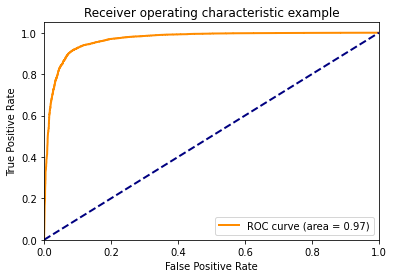

In [ ]:
n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testing[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_testing.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Multiclass**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


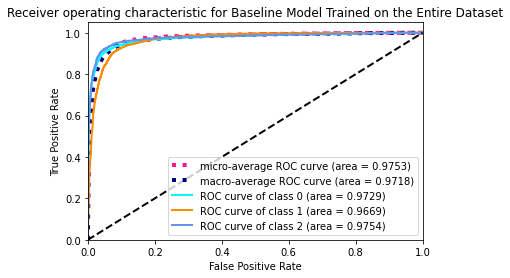

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Baseline Model Trained on the Entire Dataset')
plt.legend(loc="lower right")
plt.show()